In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
import sys 
import os
sys.path.append(os.path.abspath("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/"))
from fastSimulation import *

Welcome to JupyROOT 6.26/06


# Reading the files

In [2]:
folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/"
inputData = folder+"fastParticle211.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction211.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction211.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction211.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction211.root


## Residual maps

 FCN=2.15214e+06 FROM MIGRAD    STATUS=FAILED        147 CALLS         148 TOTAL
                     EDM=2.37142e+12    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.56963e-03   4.15937e-07  -0.00000e+00  -2.45384e+05
   2  p1           1.84366e-02   8.62610e-02   0.00000e+00  -3.57042e+07
   3  p2           3.00000e+02   2.70213e-08   0.00000e+00  -1.88857e+02
 FCN=2.08967e+06 FROM MIGRAD    STATUS=FAILED        158 CALLS         159 TOTAL
                     EDM=6.43525e+12    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.50497e-03   8.85081e-02  -0.00000e+00   5.73230e+07
   2  p1          -1.96345e-02   2.54309e-07  -0.00000e+00   2.97918e+07
   3  p2           3.0000

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqpr
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqpr2
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqpr3


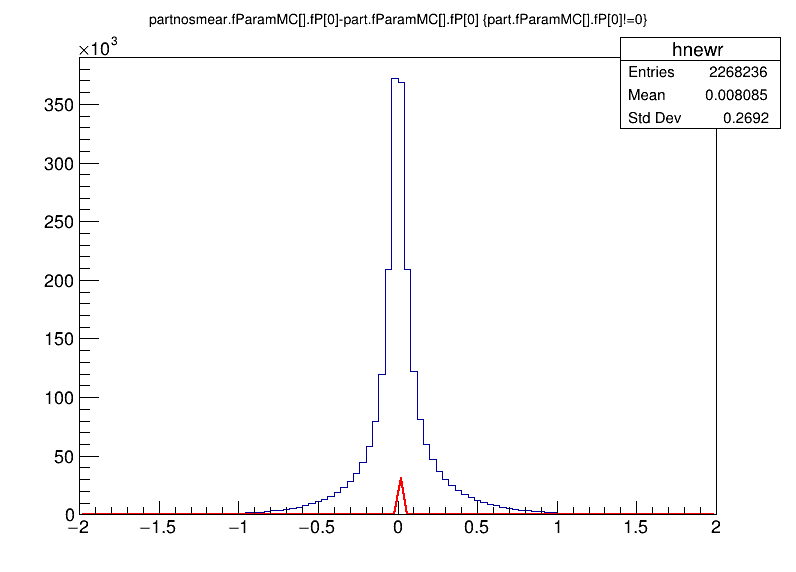

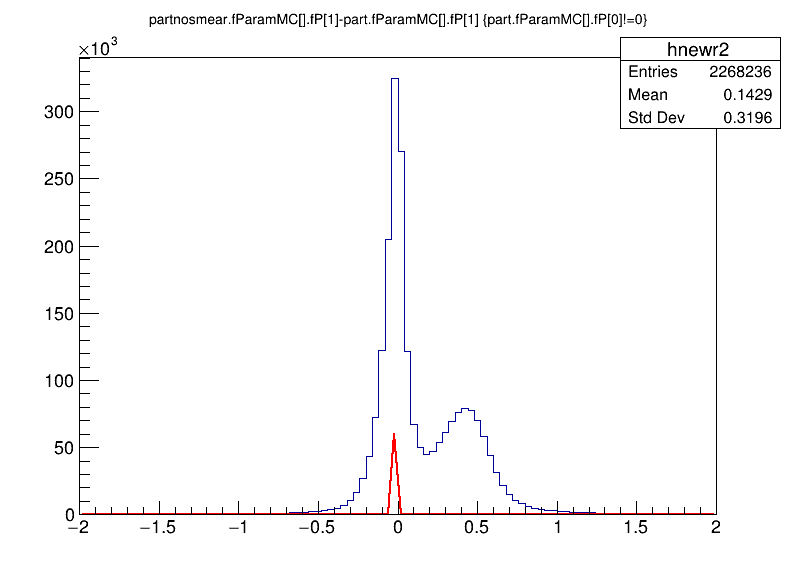

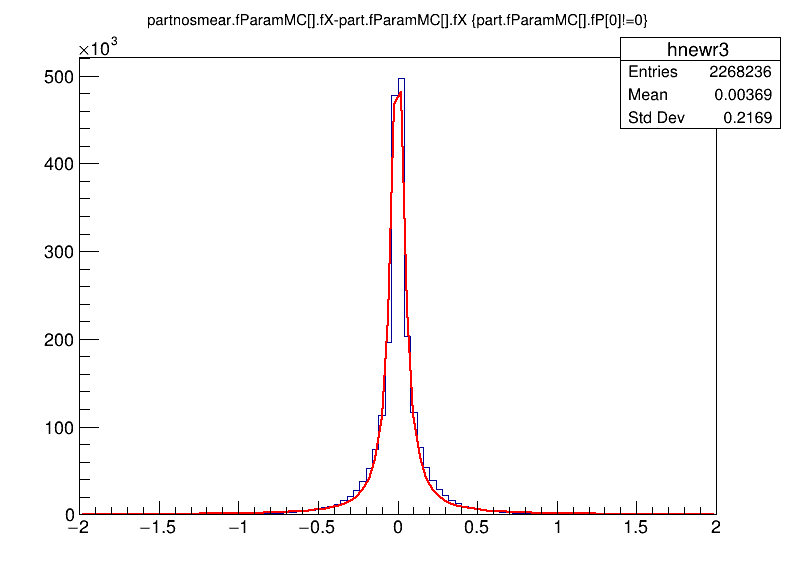

In [5]:
hqpr = ROOT.TCanvas("hqpr","hqpr",800,600)
tree.Draw("partnosmear.fParamMC[].fP[0]-part.fParamMC[].fP[0]>>hnewr(100,-2,2)","part.fParamMC[].fP[0]!=0","")
hnewr = ROOT.gPad.GetPrimitive("hnewr")
func = ROOT.TF1("cauchy","[2]*[0]/(3.14*((x-[1])*(x-[1])+[0]*[0]))",-2,2)
func.SetParameters(10,0,300)
hnewr.Fit("cauchy")
hqpr.Draw()

hqpr2 = ROOT.TCanvas("hqpr2","hqpr2",800,600)
tree.Draw("partnosmear.fParamMC[].fP[1]-part.fParamMC[].fP[1]>>hnewr2(100,-2,2)","part.fParamMC[].fP[0]!=0","")
hnewr2 = ROOT.gPad.GetPrimitive("hnewr2")
func2 = ROOT.TF1("cauchy2","[2]*[0]/(3.14*((x-[1])*(x-[1])+[0]*[0]))",-10,10)
func2.SetParameters(50,0,300)
hnewr2.Fit("cauchy2")
hqpr2.Draw()

hqpr3 = ROOT.TCanvas("hqpr3","hqpr3",800,600)
tree.Draw("partnosmear.fParamMC[].fX-part.fParamMC[].fX>>hnewr3(100,-2,2)","part.fParamMC[].fP[0]!=0","")
hnewr3 = ROOT.gPad.GetPrimitive("hnewr3")
func3 = ROOT.TF1("cauchy3","[2]*[0]/(3.14*((x-[1])*(x-[1])+[0]*[0]))",-10,10)
func3.SetParameters(50,0,300)
hnewr3.Fit("cauchy3")
hqpr3.Draw()